In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import plotly.express as px
#from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
nb = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/nba.csv')
df=nb.copy()
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [ ]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [ ]:
missingValues = df.isnull().sum()
print(missingValues)
# Percentage of missing data
totCells = np.product(df.shape)
total_missing = missingValues.sum()
percMissing = (total_missing/totCells) * 100
print("Missing Perc : ", percMissing)

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64
Missing Perc :  0.03909026297085999


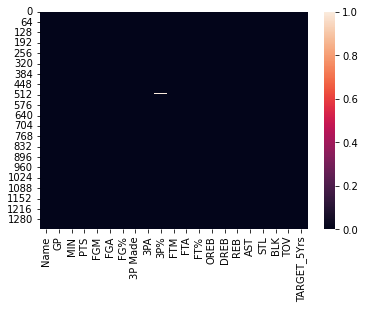

In [ ]:
sns.heatmap(df.isnull())

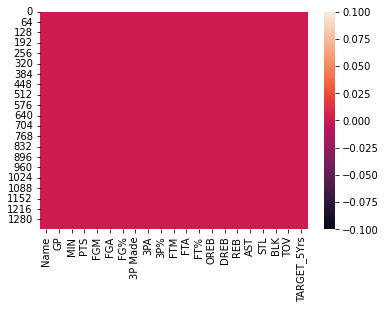

In [ ]:
df['3P%'].fillna(value=df['3P%'].mean(),inplace=True)
sns.heatmap(df.isnull())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1340 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

# **Train Test Split**

In [ ]:
new_df = df.drop("Name", axis = 1)

In [ ]:
new_df

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [ ]:
x = new_df.drop("TARGET_5Yrs", axis = 1) # axis = 1 removes column and axis = 0 removes row from dataset
y = new_df["TARGET_5Yrs"]

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, random_state=1)

print('x shape : ', x.shape)
print('x train shape and x test shape : ' ,x_train.shape, x_test.shape)
print('y shape : ', y.shape)
print('y train shape and y test shape : ' ,y_train.shape, y_test.shape)
print('y shape_mean y train shape_mean and y test shape_mean : ' ,y.mean(), y_train.mean(), y_test.mean())

x shape :  (1340, 19)
x train shape and x test shape :  (1206, 19) (134, 19)
y shape :  (1340,)
y train shape and y test shape :  (1206,) (134,)
y shape_mean y train shape_mean and y test shape_mean :  0.6201492537313433 0.6185737976782753 0.6343283582089553


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify=y)

In [ ]:
print(y.mean(), y_train.mean(), y_test.mean())

0.6201492537313433 0.6202321724709784 0.6194029850746269


In [ ]:
print(x.mean(), x_train.mean(), x_test.mean())

GP         60.414179
MIN        17.624627
PTS         6.801493
FGM         2.629104
FGA         5.885299
FG%        44.169403
3P Made     0.247612
3PA         0.779179
3P%        19.308126
FTM         1.297687
FTA         1.821940
FT%        70.300299
OREB        1.009403
DREB        2.025746
REB         3.034478
AST         1.550522
STL         0.618507
BLK         0.368582
TOV         1.193582
dtype: float64 GP         60.300995
MIN        17.590381
PTS         6.746352
FGM         2.608458
FGA         5.841211
FG%        44.117496
3P Made     0.242371
3PA         0.768159
3P%        19.206197
FTM         1.289221
FTA         1.812355
FT%        70.275373
OREB        1.015257
DREB        2.027944
REB         3.042537
AST         1.536816
STL         0.616086
BLK         0.369154
TOV         1.184080
dtype: float64 GP         61.432836
MIN        17.932836
PTS         7.297761
FGM         2.814925
FGA         6.282090
FG%        44.636567
3P Made     0.294776
3PA         0.878358
3P% 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1,random_state=1, stratify=y)

In [ ]:
print(x_train.mean(), x_test.mean(),x.mean())

GP         60.521559
MIN        17.752736
PTS         6.866169
FGM         2.651410
FGA         5.946517
FG%        44.053566
3P Made     0.251161
3PA         0.789635
3P%        19.549902
FTM         1.312935
FTA         1.842123
FT%        70.296020
OREB        1.011111
DREB        2.035406
REB         3.045854
AST         1.573715
STL         0.626202
BLK         0.372056
TOV         1.207380
dtype: float64 GP         59.447761
MIN        16.471642
PTS         6.219403
FGM         2.428358
FGA         5.334328
FG%        45.211940
3P Made     0.215672
3PA         0.685075
3P%        17.132150
FTM         1.160448
FTA         1.640299
FT%        70.338806
OREB        0.994030
DREB        1.938806
REB         2.932090
AST         1.341791
STL         0.549254
BLK         0.337313
TOV         1.069403
dtype: float64 GP         60.414179
MIN        17.624627
PTS         6.801493
FGM         2.629104
FGA         5.885299
FG%        44.169403
3P Made     0.247612
3PA         0.779179
3P% 

# Binarisation of input

In [ ]:
import matplotlib.pyplot as plt

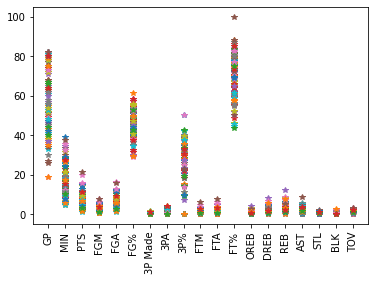

"\nplt.plot(x_train.T)\nplt.xticks(rotation='vertical')\nplt.show()\n"

In [ ]:
plt.plot(x_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
x_binary_train = x_train.apply(pd.cut, bins = 2, labels = [1,0])

In [ ]:
x_binary_test = x_test.apply(pd.cut, bins = 2, labels = [1,0])

In [ ]:
x_binary_test = x_binary_test.values
x_binary_train = x_binary_train.values

In [ ]:
type(x_binary_test)

numpy.ndarray

# MP Neuron Model

In [ ]:
for b in range(x_binary_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(x_binary_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/x_binary_train.shape[0])

0 748 0.6202321724709784
1 748 0.6202321724709784
2 748 0.6202321724709784
3 748 0.6202321724709784
4 748 0.6202321724709784
5 747 0.6194029850746269
6 744 0.6169154228855721
7 741 0.6144278606965174
8 734 0.6086235489220564
9 720 0.5970149253731343
10 707 0.5862354892205639
11 687 0.5696517412935324
12 669 0.554726368159204
13 649 0.5381426202321725
14 627 0.5199004975124378
15 594 0.4925373134328358
16 565 0.4684908789386401
17 453 0.3756218905472637
18 391 0.324212271973466
19 446 0.36981757877280264


# MP Neuron Class

In [ ]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [ ]:
mpNeuron = MPNeuron()
mpNeuron.fit(x_binary_train, y_train)

Optimal Value of  is 0
Highest accuracy is 0.6202321724709784


In [ ]:
y_test_pred = mpNeuron.predict(x_binary_test)
accuracy_test = accuracy_score(y_test_pred, y_test)

In [ ]:
print(accuracy_test)

0.6194029850746269


# Perceptron Model

In [ ]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01, iterations = 1000):
        self.bias = None
        self.weights = None
        self.activation_func = self.unit_step_func
        self.lr = learning_rate
        self.iters = iterations
        
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
        
    def unit_step_func(self, x):
        return np.where(x>=0,1,0)
    
    def fit(self, X , y):
        #X is MxN    M rows/samples and N features
        n_samples, n_features = X.shape
        
        #init weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #ensure that y is 0 or 1
        y_ = np.array([1 if i>0 else 0 for i in y])
        
        
        #we know that percepron model will converge in finite iterations
        for itr in range(self.iters):
            for indx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                #we need to update the weights
                # W = W + W'
                # W' = lr * (y - y_pred) * x
                
                update = self.lr * (y_[indx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

In [ ]:
#x_train, x_test, y_train, y_test
#convert x_train, x_test into arrays
x_train = x_train.values
print(type(x_train))
x_test = x_test.values
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
def accuracy(y_testing, y_pred):
    accuracy = np.sum(y_testing == y_pred) / len(y_testing)
    return accuracy

In [ ]:
p = Perceptron(learning_rate = 0.5, iterations=500)
p.fit(x_train,y_train)
prediction = p.predict(x_test)
print("Perceptron Accuracy: ",accuracy(y_test, prediction))

Perceptron Accuracy:  0.4701492537313433
